In [369]:
no <- 1:4
name <- c("Apple", 'Banana', "Peach", "Berry")
price <- c(500,200,200,50)
qty <- c(5,4,3,2)

In [368]:
# 데이터프레임으로 합치기
fruit <- data.frame(번호=no,제품=name,금액=price,수량=qty)
fruit

번호,제품,금액,수량
1,Apple,500,5
2,Banana,200,4
3,Peach,200,3
4,Berry,50,2


In [360]:
# 현재 메모리에 있는 변수 보기
ls()

[1] "GDP_ranking"     "GDP_ranking15"   "GDP_ranking2"    "fruit"          
 [5] "fruit2"          "i"               "iris.test"       "iris.train"     
 [9] "irisSamp"        "iris_setosa"     "iris_versicolor" "name"           
[13] "no"              "price"           "qty"             "regionAcc.mean" 
[17] "samp"            "seoul"

In [355]:
# 메모리 형태로 파일 보관
save(no, fruit, name, file="../Data/testFruit.txt") 
# 파일 형태는 아무거나 상관 없음

In [371]:
rm(no, fruit, name)

ERROR: Error in eval(expr, envir, enclos): 객체 'no'를 찾을 수 없습니다


In [373]:
# 메모리로 불러오기
load("../Data/testFruit.txt")

[1] 1 2 3 4

In [106]:
# fruit를 csv로 저장하기 
write.csv(fruit, "../Data/fruit.csv")

In [107]:
fruit2 <- read.csv("../Data/fruit.csv") # x라는 컬럼이 하나 추가되었다. x = rownames

In [108]:
write.csv(fruit2, "../Data/fruit2.csv")

In [109]:
# rownames가 계속 쌓인다
read.csv("../Data/fruit2.csv") 

X.1,X,번호,제품,금액,수량
1,1,1,Apple,500,5
2,2,2,Banana,200,4
3,3,3,Peach,200,3
4,4,4,Berry,50,2


In [110]:
# 저장시 주의 사항 : row names가 필요치 않으면 저장하지 말아야 한다.
write.csv(fruit, "../Data/fruit.csv", row.names=F)

In [111]:
read.csv("../Data/fruit.csv")

번호,제품,금액,수량
1,Apple,500,5
2,Banana,200,4
3,Peach,200,3
4,Berry,50,2


# 세계 GDP 순위 데이터 정제 및 차트 만들기

In [112]:
# Data Set 불러오기 
GDP_ranking <- read.csv("../Data/GDP.csv") 
head(GDP_ranking, 10)
tail(GDP_ranking ,10)
# 우리가 필요한 데이터 나라,순위,이름,값

X,Gross.domestic.product.2018,X.1,X.2,X.3,X.4
,,NA,,,
,,NA,,(millions of,
,Ranking,NA,Economy,US dollars),
,,NA,,,
USA,1,NA,United States,"20,494,100",
CHN,2,NA,China,"13,608,152",
JPN,3,NA,Japan,"4,970,916",
DEU,4,NA,Germany,"3,996,759",
GBR,5,NA,United Kingdom,"2,825,208",
FRA,6,NA,France,"2,777,535",


,X,Gross.domestic.product.2018,X.1,X.2,X.3,X.4
319,,,NA,,,
320,,,NA,,,
321,,,NA,,,
322,,,NA,,,
323,,,NA,,,
324,,,NA,,,
325,,,NA,,,
326,,,NA,,,
327,,,NA,,,
328,,,NA,,,


In [113]:
GDP_ranking2 <- GDP_ranking[-c(1:4),c(1,2,4,5)]
head(GDP_ranking2)

,X,Gross.domestic.product.2018,X.2,X.3
5,USA,1,United States,"20,494,100"
6,CHN,2,China,"13,608,152"
7,JPN,3,Japan,"4,970,916"
8,DEU,4,Germany,"3,996,759"
9,GBR,5,United Kingdom,"2,825,208"
10,FRA,6,France,"2,777,535"


In [114]:
# 상위 15개국만 선별한다.
GDP_ranking15 <- GDP_ranking2[c(1:15),]
#GDP_ranking15 <- head(GDP_ranking2, 15)
GDP_ranking15

,X,Gross.domestic.product.2018,X.2,X.3
5,USA,1,United States,"20,494,100"
6,CHN,2,China,"13,608,152"
7,JPN,3,Japan,"4,970,916"
8,DEU,4,Germany,"3,996,759"
9,GBR,5,United Kingdom,"2,825,208"
10,FRA,6,France,"2,777,535"
11,IND,7,India,"2,726,323"
12,ITA,8,Italy,"2,073,902"
13,BRA,9,Brazil,"1,868,626"
14,CAN,10,Canada,"1,712,510"


In [115]:
# 컬럼이름 정의 : Code, Ranking, Nation, GDP
colnames(GDP_ranking15) <- c('Code', 'Ranking', 'Nation', 'GDP')
GDP_ranking15

,Code,Ranking,Nation,GDP
5,USA,1,United States,"20,494,100"
6,CHN,2,China,"13,608,152"
7,JPN,3,Japan,"4,970,916"
8,DEU,4,Germany,"3,996,759"
9,GBR,5,United Kingdom,"2,825,208"
10,FRA,6,France,"2,777,535"
11,IND,7,India,"2,726,323"
12,ITA,8,Italy,"2,073,902"
13,BRA,9,Brazil,"1,868,626"
14,CAN,10,Canada,"1,712,510"


In [116]:
# rownames 새로 구성하기 (인덱스 번호 정리하기)
rownames(GDP_ranking15) <- c()
print(GDP_ranking15)

   Code Ranking             Nation          GDP
1   USA       1      United States  20,494,100 
2   CHN       2              China  13,608,152 
3   JPN       3              Japan   4,970,916 
4   DEU       4            Germany   3,996,759 
5   GBR       5     United Kingdom   2,825,208 
6   FRA       6             France   2,777,535 
7   IND       7              India   2,726,323 
8   ITA       8              Italy   2,073,902 
9   BRA       9             Brazil   1,868,626 
10  CAN      10             Canada   1,712,510 
11  RUS      11 Russian Federation   1,657,554 
12  KOR      12        Korea, Rep.   1,619,424 
13  AUS      13          Australia   1,432,195 
14  ESP      14              Spain   1,426,189 
15  MEX      15             Mexico   1,223,809 


In [123]:
# 구조 확인
str(GDP_ranking15)

'data.frame':	15 obs. of  4 variables:
 $ Code   : Factor w/ 15 levels "AUS","BRA","CAN",..: 15 4 11 5 8 7 9 10 2 3 ...
 $ Ranking: Factor w/ 15 levels "1","10","11",..: 1 8 9 10 11 12 13 14 15 2 ...
 $ Nation : Factor w/ 15 levels "Australia","Brazil",..: 15 4 9 6 14 5 7 8 2 3 ...
 $ GDP    : num  20494100 13608152 4970916 3996759 2825208 ...


In [118]:
# Factor의 갯수가 15개가 정상일텐데 200개 이상이다 이상하다. -> 재구성 해야한다.
GDP_ranking15$Code <- factor(GDP_ranking15$Code) 

In [119]:
# for
for(i in 1:ncol(GDP_ranking15)){
    GDP_ranking15[,i] <- factor(GDP_ranking15[,i])
}

In [ ]:
library(stringr)

In [135]:
# GDP 숫자로 변환 (천단위 쉼표 정리)
GDP_ranking15$GDP <- as.numeric(str_remove_all(GDP_ranking15$GDP, ','))
GDP_ranking15
str(GDP_ranking15)

Code,Ranking,Nation,GDP
USA,1,United States,20494100
CHN,2,China,13608152
JPN,3,Japan,4970916
DEU,4,Germany,3996759
GBR,5,United Kingdom,2825208
FRA,6,France,2777535
IND,7,India,2726323
ITA,8,Italy,2073902
BRA,9,Brazil,1868626
CAN,10,Canada,1712510


'data.frame':	15 obs. of  4 variables:
 $ Code   : Factor w/ 15 levels "AUS","BRA","CAN",..: 15 4 11 5 8 7 9 10 2 3 ...
 $ Ranking: Factor w/ 15 levels "1","10","11",..: 1 8 9 10 11 12 13 14 15 2 ...
 $ Nation : Factor w/ 15 levels "Australia","Brazil",..: 15 4 9 6 14 5 7 8 2 3 ...
 $ GDP    : num  20494100 13608152 4970916 3996759 2825208 ...


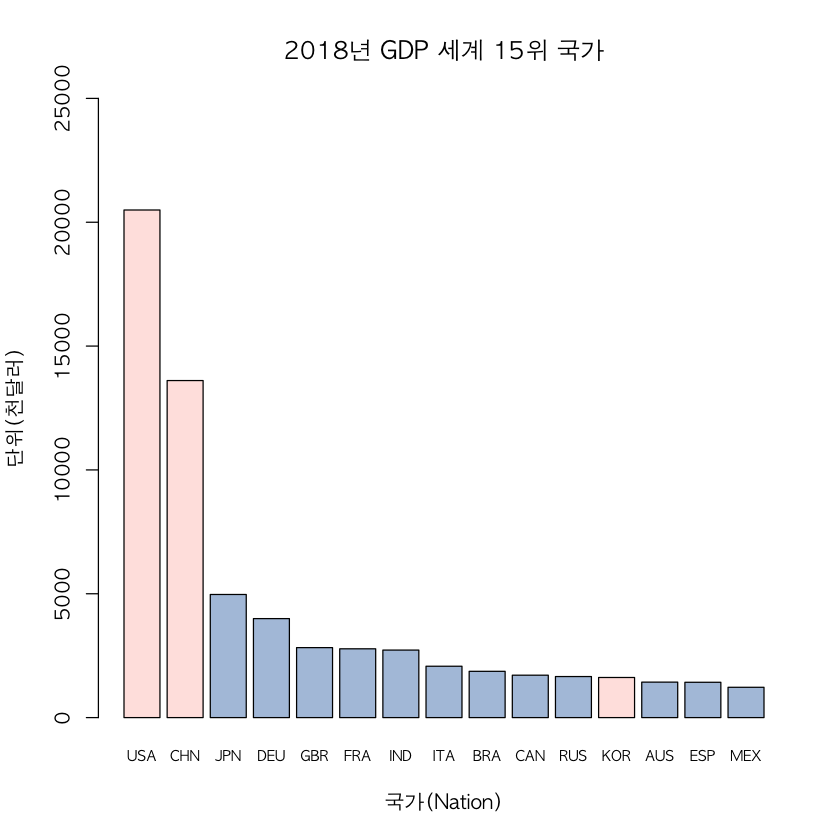

In [205]:
# 막대그래프 그리기
options(scipen=100)
options(warn = -1)
par(family = 'AppleGothic')
barplot(GDP_ranking15$GDP / 1000, # GDP상위 15개국 Data
        main = "2018년 GDP 세계 15위 국가",
        xlab = "국가(Nation)",
        ylab = "단위(천달러)",
        names = GDP_ranking15$Code,
        cex.names = 0.7,
        #col = c(rep("mistyrose",2), rep("lavender",9), "mistyrose", rep('lavender',3)),
        col = ifelse(GDP_ranking15$Code == c('USA','CHN','KOR'), "mistyrose", "Light steel blue"),
        ylim = c(0 , 25000)
     )

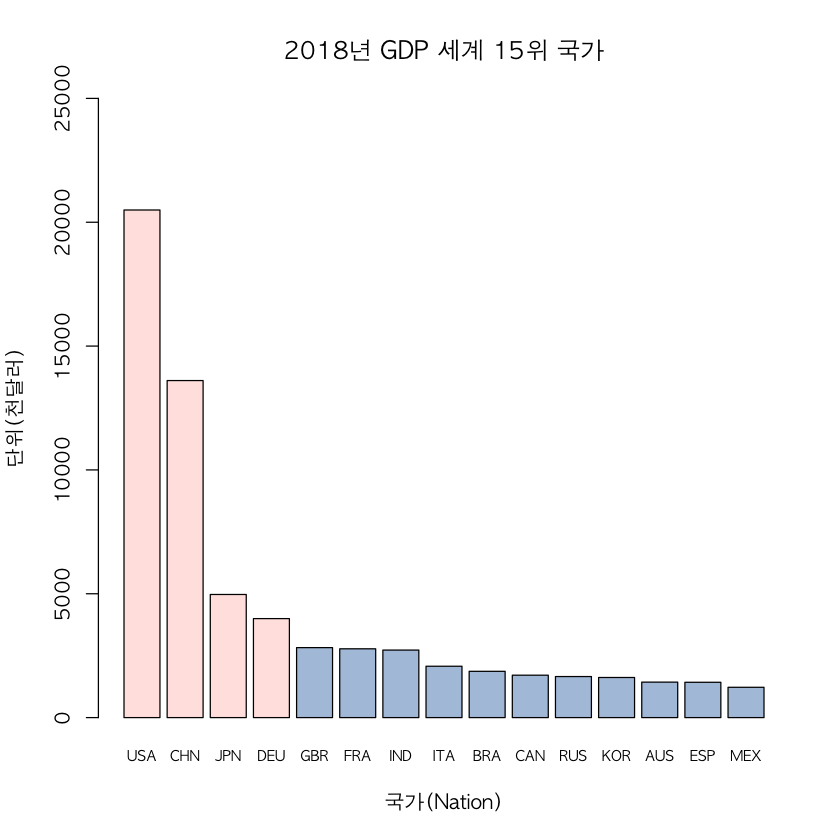

In [204]:
# GDP가 3000 이상인 국가 만 빨간색으로 표시하기
options(scipen=100)
options(warn = -1)
par(family = 'AppleGothic')
barplot(GDP_ranking15$GDP / 1000, # GDP상위 15개국 Data
        main = "2018년 GDP 세계 15위 국가",
        xlab = "국가(Nation)",
        ylab = "단위(천달러)",
        names = GDP_ranking15$Code,
        cex.names = 0.7,
        col = ifelse(GDP_ranking15$GDP/1000 >= 3000, "mistyrose", "Light steel blue"),
        ylim = c(0 , 25000)
     )


---
# 데이터 처리
##### 주구장창 쓸거임

In [207]:
# 데이터 정렬하기
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [214]:
# iris Sepal.length 기준으로 오름차순 정렬하기
# 1차 정렬
head(arrange(iris, Sepal.Length))

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
4.3,3.0,1.1,0.1,setosa
4.4,2.9,1.4,0.2,setosa
4.4,3.0,1.3,0.2,setosa
4.4,3.2,1.3,0.2,setosa
4.5,2.3,1.3,0.3,setosa
4.6,3.1,1.5,0.2,setosa


In [215]:
# iris Sepal.Length 기준으로 정령 후 동일한 크기를 가진 데이터 발생 시 Petal.Length 기준으로 오름차순 정렬
# 1차 정렬, 2차 정렬
head(arrange(iris, Sepal.Length, Petal.Length))

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
4.3,3.0,1.1,0.1,setosa
4.4,3.0,1.3,0.2,setosa
4.4,3.2,1.3,0.2,setosa
4.4,2.9,1.4,0.2,setosa
4.5,2.3,1.3,0.3,setosa
4.6,3.6,1.0,0.2,setosa


In [216]:
# Sepal.Length 기준으로 내림차순 정렬
# 내림차순 할 컬럼에 desc() 를 걸어주면 된다.
head(arrange(iris, desc(Sepal.Length)))

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
7.9,3.8,6.4,2.0,virginica
7.7,3.8,6.7,2.2,virginica
7.7,2.6,6.9,2.3,virginica
7.7,2.8,6.7,2.0,virginica
7.7,3.0,6.1,2.3,virginica
7.6,3.0,6.6,2.1,virginica


In [220]:
# Sepal.Length 기준으로 내림차순 정렬 후 Sepal.Length와 Sepal.Width 만 보기
head(arrange(iris, desc(Sepal.Length))[,1:2])
head(arrange(iris[,1:2], desc(Sepal.Length)))

Sepal.Length,Sepal.Width
7.9,3.8
7.7,3.8
7.7,2.6
7.7,2.8
7.7,3.0
7.6,3.0


Sepal.Length,Sepal.Width
7.9,3.8
7.7,3.8
7.7,2.6
7.7,2.8
7.7,3.0
7.6,3.0


---
# 샘플링(Sampling)
- 샘플링한 데이터가 모집단의 의미를 가지고 있어야 가치가 있다. (meaningful)
- 특징을 알아야 샘플링을 할 수 있다

In [222]:
# 랜덤 샘플링 (중복값을 허용하지 않음)
sample(1:45 , 6)

[1] 19 38 27 42 39 34

In [223]:
nrow(iris)
ncol(iris)

[1] 150

[1] 5

In [230]:
samp <- sample(1:nrow(iris), nrow(iris)*0.7)
head(samp)

[1]  68 105  96  18 117   6

In [237]:
irisSamp <- iris[samp,]
head(irisSamp)
summary(irisSamp) # Species 종이 1:1:1 인 특성이 망가졌다. 샘플 실패 # 특징을 알아야 샘플링을 할 수 있다
summary(iris) 
table(irisSamp$Species)


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
68,5.8,2.7,4.1,1.0,versicolor
105,6.5,3.0,5.8,2.2,virginica
96,5.7,3.0,4.2,1.2,versicolor
18,5.1,3.5,1.4,0.3,setosa
117,6.5,3.0,5.5,1.8,virginica
6,5.4,3.9,1.7,0.4,setosa


  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width         Species  
 Min.   :4.300   Min.   :2.000   Min.   :1.100   Min.   :0.10   setosa    :40  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.500   1st Qu.:0.20   versicolor:33  
 Median :5.700   Median :3.000   Median :4.200   Median :1.30   virginica :32  
 Mean   :5.766   Mean   :3.102   Mean   :3.584   Mean   :1.13                  
 3rd Qu.:6.300   3rd Qu.:3.400   3rd Qu.:5.000   3rd Qu.:1.80                  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.50                  

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                


    setosa versicolor  virginica 
        40         33         32 

In [240]:
# iris Sampling시 Species 별로 Sampling 한다
samp <- c(sample(1:50, 35) , sample(55:100, 35) , sample(101:150, 35))


In [241]:
irisSamp <- iris[samp,]
table(irisSamp$Species)


    setosa versicolor  virginica 
        35         35         35 

In [242]:
# Training DAta와 Test Data 분리하기
iris.train <- iris[samp,]
iris.test <- iris[-samp,]

In [245]:
summary(iris.train)
summary(iris.test)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width         Species  
 Min.   :4.400   Min.   :2.000   Min.   :1.200   Min.   :0.10   setosa    :35  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.40   versicolor:35  
 Median :5.800   Median :3.000   Median :4.400   Median :1.30   virginica :35  
 Mean   :5.862   Mean   :3.086   Mean   :3.779   Mean   :1.22                  
 3rd Qu.:6.400   3rd Qu.:3.400   3rd Qu.:5.100   3rd Qu.:1.80                  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.50                  

  Sepal.Length  Sepal.Width     Petal.Length    Petal.Width          Species  
 Min.   :4.3   Min.   :2.200   Min.   :1.000   Min.   :0.100   setosa    :15  
 1st Qu.:5.1   1st Qu.:2.700   1st Qu.:1.600   1st Qu.:0.200   versicolor:15  
 Median :5.7   Median :3.000   Median :4.100   Median :1.300   virginica :15  
 Mean   :5.8   Mean   :2.991   Mean   :3.709   Mean   :1.151                  
 3rd Qu.:6.4   3rd Qu.:3.200   3rd Qu.:5.100   3rd Qu.:1.800                  
 Max.   :7.4   Max.   :3.800   Max.   :6.300   Max.   :2.500                  

--- 
# 부분 집합

In [258]:
# iris에서 Species가 Setosa인 것만 추출하여 iris_setosa라는 데이터프레임 만들기
iris_setosa <- subset(iris, Species == 'setosa')
head(iris_setosa)
summary(iris_setosa)
str(iris_setosa)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.300   Min.   :1.000   Min.   :0.100  
 1st Qu.:4.800   1st Qu.:3.200   1st Qu.:1.400   1st Qu.:0.200  
 Median :5.000   Median :3.400   Median :1.500   Median :0.200  
 Mean   :5.006   Mean   :3.428   Mean   :1.462   Mean   :0.246  
 3rd Qu.:5.200   3rd Qu.:3.675   3rd Qu.:1.575   3rd Qu.:0.300  
 Max.   :5.800   Max.   :4.400   Max.   :1.900   Max.   :0.600  
       Species  
 setosa    :50  
 versicolor: 0  
 virginica : 0  
                
                
                

'data.frame':	50 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [261]:
iris_setosa$Species <- factor(iris_setosa$Species)
str(iris_setosa)

'data.frame':	50 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 1 level "setosa": 1 1 1 1 1 1 1 1 1 1 ...


In [277]:
# iris 에서 Species가 versicolor인 것만 추출하여 iris_versicolor라는 데이터프레임 만들기
iris_versicolor <- subset(iris, Species == 'versicolor')
iris_versicolor$Species <- factor(iris_versicolor$Species)
rownames(iris_versicolor) = c()
str(iris_versicolor)
print(iris_versicolor)

'data.frame':	50 obs. of  5 variables:
 $ Sepal.Length: num  7 6.4 6.9 5.5 6.5 5.7 6.3 4.9 6.6 5.2 ...
 $ Sepal.Width : num  3.2 3.2 3.1 2.3 2.8 2.8 3.3 2.4 2.9 2.7 ...
 $ Petal.Length: num  4.7 4.5 4.9 4 4.6 4.5 4.7 3.3 4.6 3.9 ...
 $ Petal.Width : num  1.4 1.5 1.5 1.3 1.5 1.3 1.6 1 1.3 1.4 ...
 $ Species     : Factor w/ 1 level "versicolor": 1 1 1 1 1 1 1 1 1 1 ...
   Sepal.Length Sepal.Width Petal.Length Petal.Width    Species
1           7.0         3.2          4.7         1.4 versicolor
2           6.4         3.2          4.5         1.5 versicolor
3           6.9         3.1          4.9         1.5 versicolor
4           5.5         2.3          4.0         1.3 versicolor
5           6.5         2.8          4.6         1.5 versicolor
6           5.7         2.8          4.5         1.3 versicolor
7           6.3         3.3          4.7         1.6 versicolor
8           4.9         2.4          3.3         1.0 versicolor
9           6.6         2.9          4.6         1.3 v

In [282]:
# iris에서 Species가 setosa이고 Sepal.Length가 5 보다 큰 sample(data)의 갯수는?
nrow(subset(iris, Species == 'setosa' & Sepal.Length > 5))
subset(iris, Species == 'setosa' & Sepal.Length > 5)

[1] 22

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
11,5.4,3.7,1.5,0.2,setosa
15,5.8,4.0,1.2,0.2,setosa
16,5.7,4.4,1.5,0.4,setosa
17,5.4,3.9,1.3,0.4,setosa
18,5.1,3.5,1.4,0.3,setosa
19,5.7,3.8,1.7,0.3,setosa
20,5.1,3.8,1.5,0.3,setosa
21,5.4,3.4,1.7,0.2,setosa


In [285]:
# subset으로 컬럼 지우기 (행지우기는어렵)
subset(iris, select = c(Sepal.Length, Species))
subset(iris, select = -Species)

Sepal.Length,Species
5.1,setosa
4.9,setosa
4.7,setosa
4.6,setosa
5.0,setosa
5.4,setosa
4.6,setosa
5.0,setosa
4.4,setosa
4.9,setosa


Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
5.1,3.5,1.4,0.2
4.9,3.0,1.4,0.2
4.7,3.2,1.3,0.2
4.6,3.1,1.5,0.2
5.0,3.6,1.4,0.2
5.4,3.9,1.7,0.4
4.6,3.4,1.4,0.3
5.0,3.4,1.5,0.2
4.4,2.9,1.4,0.2
4.9,3.1,1.5,0.1


---
# 그룹 연산 함수
- 많이 사용할거임
- y = ax + b 를 y ~ x (이렇게 사용하는 것이 틸트)

In [286]:
# iris에서 Species 기준으로 Sepal.Width 의 평균 구하기
aggregate( Sepal.Width ~ Species, iris, mean) # 알아서 그룹핑 해서 평균을 내준다

Species,Sepal.Width
setosa,3.428
versicolor,2.770
virginica,2.974


---
# 서울시 교통사고 조사 데이터셋 

In [332]:
# 데이터셋을 불러와서 seoul이라는 변수에 넣기
seoul <- read.csv(("../Data/newSeoul2019.csv") )
head(seoul)
tail(seoul) 
str(seoul) 
summary(seoul) # 정규분포가 오른쪽,높은쪽으로 쏠려있음

년도,월,자치구명,발생건수,사망자수,부상자수
2011,1,종로구,115,2,165
2011,2,종로구,99,0,134
2011,3,종로구,116,0,162
2011,4,종로구,110,1,153
2011,5,종로구,122,0,157
2011,6,종로구,116,3,163


,년도,월,자치구명,발생건수,사망자수,부상자수
2695,2019,7,강동구,146,2,189
2696,2019,8,강동구,127,2,175
2697,2019,9,강동구,98,2,137
2698,2019,10,강동구,108,1,144
2699,2019,11,강동구,146,0,199
2700,2019,12,강동구,108,1,131


'data.frame':	2700 obs. of  6 variables:
 $ 년도    : int  2011 2011 2011 2011 2011 2011 2011 2011 2011 2011 ...
 $ 월      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ 자치구명: Factor w/ 25 levels "강남구","강동구",..: 23 23 23 23 23 23 23 23 23 23 ...
 $ 발생건수: int  115 99 116 110 122 116 103 122 121 135 ...
 $ 사망자수: int  2 0 0 1 0 3 1 1 2 2 ...
 $ 부상자수: int  165 134 162 153 157 163 154 171 166 193 ...


      년도            월           자치구명       발생건수        사망자수     
 Min.   :2011   Min.   : 1.00   강남구 : 108   Min.   : 45.0   Min.   : 0.000  
 1st Qu.:2013   1st Qu.: 3.75   강동구 : 108   1st Qu.:100.0   1st Qu.: 0.000  
 Median :2015   Median : 6.50   강북구 : 108   Median :122.0   Median : 1.000  
 Mean   :2015   Mean   : 6.50   강서구 : 108   Mean   :133.3   Mean   : 1.207  
 3rd Qu.:2017   3rd Qu.: 9.25   관악구 : 108   3rd Qu.:149.0   3rd Qu.: 2.000  
 Max.   :2019   Max.   :12.00   광진구 : 108   Max.   :383.0   Max.   :10.000  
                                (Other):2052                                   
    부상자수    
 Min.   : 55.0  
 1st Qu.:138.0  
 Median :168.0  
 Mean   :187.4  
 3rd Qu.:208.0  
 Max.   :552.0  
                

In [334]:
# 서울 데이터의 NA 찾기 
sum(is.na(seoul)) # 여기서 일차적으로 확인하고 0 이면 패스 , 값이 있으면 컬럼별 NA값을 확인한다

for(i in 1: ncol(seoul)){
    cat( colnames(seoul)[i], ":" , sum(is.na(seoul[,i])) ,"\n")
}

[1] 0

년도 : 0 
월 : 0 
자치구명 : 0 
발생건수 : 0 
사망자수 : 0 
부상자수 : 0 


## 컬럼별 데이터 확인

In [338]:
# 년도별 데이터가 동일한지 확인
table(seoul$년도)

# 월 별
table(seoul$월)

# 자치구 별
table(seoul$자치구)




2011 2012 2013 2014 2015 2016 2017 2018 2019 
 300  300  300  300  300  300  300  300  300 


  1   2   3   4   5   6   7   8   9  10  11  12 
225 225 225 225 225 225 225 225 225 225 225 225 


  강남구   강동구   강북구   강서구   관악구   광진구   구로구   금천구 
     108      108      108      108      108      108      108      108 
  노원구   도봉구 동대문구   동작구   마포구 서대문구   서초구   성동구 
     108      108      108      108      108      108      108      108 
  성북구   송파구   양천구 영등포구   용산구   은평구   종로구     중구 
     108      108      108      108      108      108      108      108 
  중랑구 
     108 

## 분석 시작

In [348]:
# 자치구별 발생건수의 평균
regionAcc.mean <- aggregate( 발생건수 ~ 자치구명, seoul , mean)
head(regionAcc.mean)

자치구명,발생건수
강남구,306.3611
강동구,118.5370
강북구,101.7870
강서구,145.4722
관악구,128.3889
광진구,103.0741


In [351]:
# regionAcc.mean을 발생건수 기준으로 내림차순 정렬하기
arrange(regionAcc.mean, desc(발생건수))
# 평균값을 믿어도 되는지 ?

자치구명,발생건수
강남구,306.36111
송파구,224.75926
영등포구,194.64815
서초구,186.48148
동대문구,153.64815
강서구,145.47222
마포구,141.51852
중랑구,138.46296
성북구,130.85185
노원구,129.21296


> 4/28  수업 끗